# SyriaTel Churn Prediction

# Business Understanding

Churn is a one of the biggest problems in the telecom industry.

For Telecom companies it is important to attract new customers and at the same time prevent old ones from leaving their companies. There are different reasons why customers may choose to terminate their contracts, including pricing, poor customer service, change in customer preference, among others.

Due to the direct effect of churn on revenues, telecom companies apply machine learning models to predict churn on an individual customer basis and take countermeasures such as discounts, special offers, or other measures to keep their customers. Finding factors that contribute to customer churn is important so as to take the necessary actions in order to reduce this churn.




# Data Understanding

The dataset contains data on the customers of a Telecom company. Each row represents a customer and the columns contain customer’s attributes which are described in the following:

state – The U.S. state where the customer lives.

account length – How long the customer has had an account, in days.

area code – The area code of the customer's phone number.

phone number – The customer's phone number

international plan – Whether the customer has an international calling plan.

voice mail plan – Whether the customer has a voicemail plan.

number vmail messages – Number of voicemail messages the customer has.

total day minutes – Total minutes the customer spent on calls during the day.

total day calls – Total number of calls made during the day.

total day charge – The cost of the daytime calls.

total eve minutes – Total minutes of evening calls.

total eve calls – Number of evening calls.

total eve charge – The cost of the evening calls.

total night minutes – Total minutes of night-time calls.

total night calls – Number of night-time calls.

total night charge – The cost of the night-time calls.

total intl minutes – Total minutes of international calls.

total intl calls – Number of international calls.

total intl charge – Cost of international calls.

customer service calls – Number of times the customer called customer service.



churn – Whether the customer left the service (TRUE) or stayed (FALSE).

The dataset itself can be found here - https://www.kaggle.com/becksddf/churn-in-telecoms-dataset


First, we shall import the necessary libraries to facilitate our workflow.

In [27]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report,roc_curve, auc
%matplotlib inline

We then take a look at the first few rows to get an initial understanding of what the values of the various columns are like.

In [2]:
# Loading dataset
df = pd.read_csv("SyriaTel Data.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# Understanding the column content
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

(3333, 21)

In [4]:
# Summary statistics for the columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
df.describe(include="object")

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,400-4344,no,no
freq,106,1,3010,2411


churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


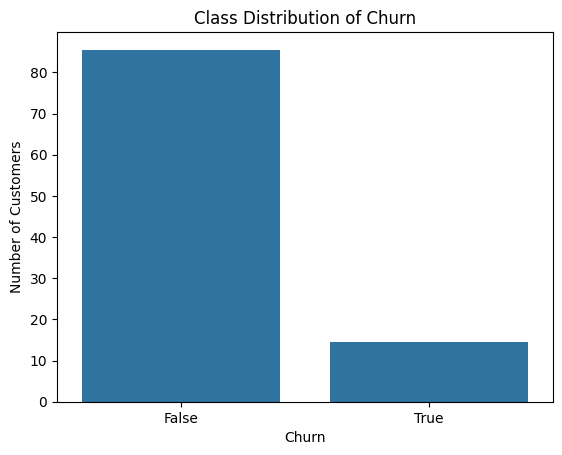

In [6]:
# Checking for class imbalance
class_counts = df['churn'].value_counts(normalize=True) * 100
print(class_counts)

# Plotting the class distribution
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

There is a clear imbalance of the target variable which could lead to the bias of the model towards the majority category. We shall adress this imbalance by applying the use of Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic examples of the minority class only on the training data to avoid data leakage.

# Data Preparation

The dataset has different columns that may need manipulation in order to prepare them for modelling. This is necessary as machine learning models need the features under specific conditions in order to properly function.

In [7]:
# Dropping phone number as it is unnecessary
df.drop(columns=['phone number',], inplace=True)

# Encoding 'yes'/'no' columns into binary
df['international plan'] = df['international plan'].map({'yes': 1, 'no': 0})
df['voice mail plan'] = df['voice mail plan'].map({'yes': 1, 'no': 0})

# Converting 'churn' from boolean to binary
df['churn'] = df['churn'].astype(int)

df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [8]:
# One-Hot Encoding to convert state into one column per state
df = pd.get_dummies(df, columns=['state'], drop_first=True)

In [9]:
# Defining target and features
X = df.drop('churn', axis=1)
y = df['churn']

In [10]:
# Splitting data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [11]:
# Applying SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Modelling

# Logistic Regression Model

Despite its name, a Logistic Regression is actually a classification algorithm and not regression. It is used when the target variable is categorical.

It predicts the probability that a given input belongs to a certain class.

A logistic regression is simple, fast and easy to interpret.

We shall start by creating a logistic regression model.

In [13]:
# Training the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [14]:
# Predicting on test data
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # for ROC AUC

In [15]:
# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8575712143928036
Precision: 0.5185185185185185
Recall: 0.28865979381443296
F1 Score: 0.3708609271523179
ROC AUC Score: 0.7897449810092241

Confusion Matrix:
 [[544  26]
 [ 69  28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       570
           1       0.52      0.29      0.37        97

    accuracy                           0.86       667
   macro avg       0.70      0.62      0.65       667
weighted avg       0.83      0.86      0.84       667



**ROC Curve (Receiver Operating Characteristic Curve)**

The ROC curve is a plot that showing how well a classifier can distinguish between two classes, positive and negative, at various thresholds.

AUC (Area Under the Curve)
AUC stands for Area Under the Curve of the ROC.

It basically summarizes the performance of the model into a single number.

Key AUC Values:

1.0 = Perfect classifier

0.5 = Similar to random guessing

< 0.5 = Worse than random as it could be an inverted classifier

The higher the AUC, the better the model is at distinguishing between the classes.

It is very helpful especially when the classes are imbalanced, just like in our target.



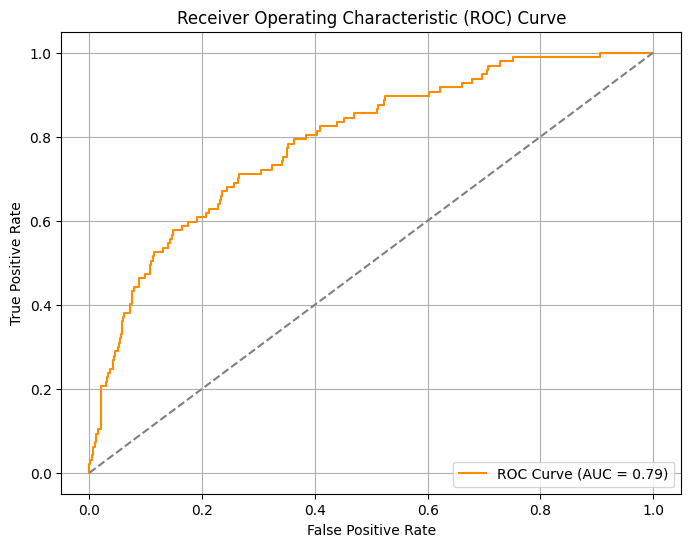

In [16]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**ROC AUC Curve Interpretation**

AUC (Area Under the Curve) = 0.79

This means that The model can distinguish between churners and non-churners 79% of the time.

This is a decent performance and suggests that the model is quite effective at identifying potential churners.

The curve is above the diagonal by quite much, especially at lower false positive rates.

This suggests the model performs well at distinguishing classes with a low error rate in that region.


## Model Performance

**Accuracy: 0.8576**

The model correctly predicts churn vs. no churn 85.76% of the time.

This may seem high, but can be very misleading due to class imbalance as most customers do not churn. That means that even a model that predicts “no churn” all the time can get high accuracy.

**Precision for class 1 (churn): 0.5185**

Of all customers predicted to churn, 51.85% actually did.

There is a decent chance the model will falsely flag some customers as churners (false positives). However, this may be beared with if the cost of retaining non-churners is lower than losing churners.

**Recall (churn): 0.2887**

Only 28.87% of actual churners were correctly identified.

Very low recall, which is a major concern. Over 70% of the customers who actually churned are missing. For this churn model, recall is more important than precision as we want to catch as many churners as possible for intervention.

**F1 Score: 0.3709**

This is the harmonic mean of precision and recall. It is low because recall is low.

The model’s balance between catching churners and being accurate when it does is not strong.

**ROC AUC Score: 0.7897**

This is the overall ability to discriminate between churners and non-churners.

It is quite decent (closer to 1 is better), which suggests that the model does have some underlying signal.

**Confusion Matrix:**

* True Negatives (TN): 544

* False Positives (FP): 26

* False Negatives (FN): 69

* True Positives (TP): 28

Implication:

We are catching only 28 churners but missing 69, which is concerning for a retention strategy.


**Classification Report:**

Class 0 (no churn): High precision, recall, F1 (model is very good at predicting who non-churners)

Class 1 (churn): Lower performance across the board



**Business Implications**

Retention Strategy Risk:

If this model is used to guide customer retention efforts, a large portion of churners will definately be missed as it may not act on customers who are actually at risk of churning.

Cost-Effectiveness:

Intervening on false positives (non-churners predicted as churners) could waste some resources, but this may be more acceptable than missing true churners.



**To Summarize:**

The model is highly accurate overall, but massively underperforms in detecting actual churners.

Recall on churn is too low for it to be effective at all in preventing loss of customers.


**The next thing is to tune the model for better performance**



# Hyperparameter tuning for logistic regression model

We shall tune the Logistic Regression model with L1 Regularization by:


*  Using penalty='l1' and solver='liblinear'

*  Tuning the C parameter (inverse of regularization strength)

*  Using Grid Search to find the best value (It is a method that tests each combination of values and selects the one that yields the highest performance)

In [19]:
# Defining parameter grid, smaller C = stronger regularization
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'class_weight': ['balanced']  }

# Model with L1 regularization
l1_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Grid search
grid = GridSearchCV(estimator=l1_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_scaled, y_train_resampled)

# Better model
better_model = grid.best_estimator_
print("Best C value:", grid.best_params_['C'])

# Predicting on test data
y_pred = better_model.predict(X_test_scaled)
y_proba = better_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation of model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Best C value: 100
Accuracy: 0.856071964017991
Precision: 0.509090909090909
Recall: 0.28865979381443296
F1 Score: 0.3684210526315789

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92       570
           1       0.51      0.29      0.37        97

    accuracy                           0.86       667
   macro avg       0.70      0.62      0.64       667
weighted avg       0.83      0.86      0.84       667

Confusion Matrix:
 [[543  27]
 [ 69  28]]
ROC AUC Score: 0.7879363356845723


The model seems to be performing similarly to the baseline model. This is not optimal as it does not predict the actual churners as well as we could hope. The next thing we should do is create another model in the hope that it performs much better than the first ones.

# Decision Tree Classifier

A Decision Tree Classifier is a type of learning algorithm used for classification tasks. It works by splitting a dataset into branches based on feature values then forming a tree-like structure that leads to a final prediction.

A decision tree classifier is easy to understand and visualize, handles both numerical and categorical data and requires minimal data preprocessing.

In [21]:
# Initializing and fitting model
tree = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
tree.fit(X_train_resampled, y_train_resampled)

# Predicting on test data
y_pred = tree.predict(X_test)
y_proba = tree.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.8620689655172413
Precision: 0.5210084033613446
Recall: 0.6391752577319587
F1 Score: 0.5740740740740741
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       570
           1       0.52      0.64      0.57        97

    accuracy                           0.86       667
   macro avg       0.73      0.77      0.75       667
weighted avg       0.88      0.86      0.87       667

Confusion Matrix:
 [[513  57]
 [ 35  62]]
ROC AUC Score: 0.7791463194067644


**Accuracy - 0.8621**

86.2% of predictions are correct which is a small improvement over logistic regression (85.8%).


**Precision (churn) - 0.5210**

When predicting a customer will churn, the model is correct 52% of the time.

**Recall (churn)- 0.6392**

When predicting a customer will churn, the model is correct 52% of the time.

**F1 Score -	0.5741**

Balanced score between precision and recall, also significantly improved from the 0.37 of the logistic regression.

**ROC AUC Score -	0.7791**

It is slightly lower than the logistic regression's 0.7897, but still decent and indicates the model separates classes well enough.



**Churn (class 1) is handled much better now as:**

A Recall of 0.64 means we are catching nearly 2 out of every 3 churners.

A Precision of 0.52 is similar to before, which means some non-churners are still misclassified, but is still tolerable.

**As for the Confusion matrix:**

We can now correctly identify 62 churners, as compared to only 28 in the logistic regression.

False positives, 57, are higher than before, 26, but this is a trade-off for catching more churners than before.

False negatives, 35, are much less than in logistic regression, 69.


**Positive Implications on Churn Management**

Now were catching almost 2/3 of churners. This is much more actionable for retention efforts.

Still maintaining a decent precision, meaning interventions may not waste too many resources on false churn predictions.


**Negative Implication**

Slight increase in false positives, non-churners predicted to churn. If the intervention is costly, this might require careful budget management or prioritizating based on the probability of churn.


**Therefore:**

The decision tree model performs significantly better in terms of recall and F1 score, which are critical for churn problems.

**The next thing is to tune the decision tree for better performance.**

# Decision Tree Hyperparameter Tuning

Now we apply hyperparameter tuning via GridSearchCV to the Decision Tree model, thus optimizing for F1 Score.

GridSearchCV is used to automate the process of hyperparameter tuning for machine learning models. It finds the best combination of hyperparameters for a model. This is done by attempting all possible combinations in a grid, evaluating them using cross-validation then returning the combination that performs best.

In [22]:
# Defining the parameter grid
param_grid = {'max_depth': [3, 5, 7, 10, None],'min_samples_split': [2, 5, 10, 20],'class_weight': ['balanced']}

# Initializing the model
tree = DecisionTreeClassifier(random_state=42)

# Performing Grid search with cross-validation
grid_search = GridSearchCV(estimator=tree,param_grid=param_grid,cv=5,scoring='f1',n_jobs=-1)

# Fitting to resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best version of the model
best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predicting on test set
y_pred = best_tree.predict(X_test)
y_proba = best_tree.predict_proba(X_test)[:, 1]

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5}
Accuracy: 0.8455772113943029
Precision: 0.4794520547945205
Recall: 0.7216494845360825
F1 Score: 0.5761316872427984

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       570
           1       0.48      0.72      0.58        97

    accuracy                           0.85       667
   macro avg       0.71      0.79      0.74       667
weighted avg       0.88      0.85      0.86       667

Confusion Matrix:
 [[494  76]
 [ 27  70]]
ROC AUC Score: 0.7963917525773195


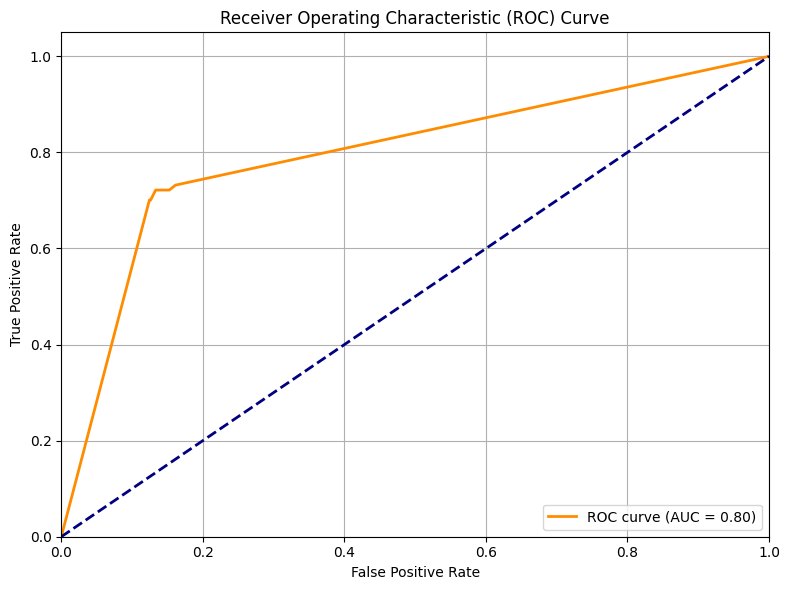

In [24]:
# Getting false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**ROC AUC Curve Interpretation**

AUC (Area Under the Curve) = 0.80

This means that the model can distinguish between churners and non-churners 80% of the time.

This is good performance and suggests the model is slightly more effective at identifying potential churners.

The ROC curve shows a steep rise adjacent to the top-left corner, which indicates:

High true positive rate - model catches most churners early

Low false positive rate - fewer mistakes in flagging non-churners

# Model Evaluation

**Accuracy - 0.8456**

84.6% of predictions are correct. Slightly lower than before which is a trade-off for higher recall.

**Precision (churn) - 0.4795**

47.95% of predicted churners actually churn which is slightly lower than earlier models.


**Recall (Churn) - 0.7216**

A huge improvement as nearly 3 out of 4 actual churners correctly identified.

**F1 Score (Churn) - 0.5761**

The best overall balance of precision and recall across all the models.

**ROC AUC Score - 0.7964**

This is the best ROC AUC indicating the strongest separation ability between churners and non-churners.


**The Churn class has been handled best as:**

A small dip in precision for churn class compared to untuned decision tree.

There is a major gain in recall as the the model now captures 72% of churners, up from 64% previously and 29% in logistic regression.

Churner detection seems to be highly effective.


**Confusion Matrix**

Best true positive count so far as 70 churners are caught.

False negatives (27) are lowest so far which is better than 35 (untuned Decision Tree) and 69 (Logistic Regression).

False positives (76) increased, though it is expected when prioritizing recall.


Business Implications for Churn Prediction


**Strengths**

Best recall so far (72%) — we are now catching most of the at-risk customers.

Still maintaining a similar precision, meaning customer interventions won’t be excessively wasted on non-churners.

Highest AUC — indicates that this model is best at ranking customers by churn risk.

**Weakness**

More false positives — 76 customers flagged as churners who are not. This could slightly burden retention resources.

However, if churn costs more than a retention campaign, the trade-off could be worth it.





# Feature Importance

<ipython-input-26-e0be58d50dbe>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


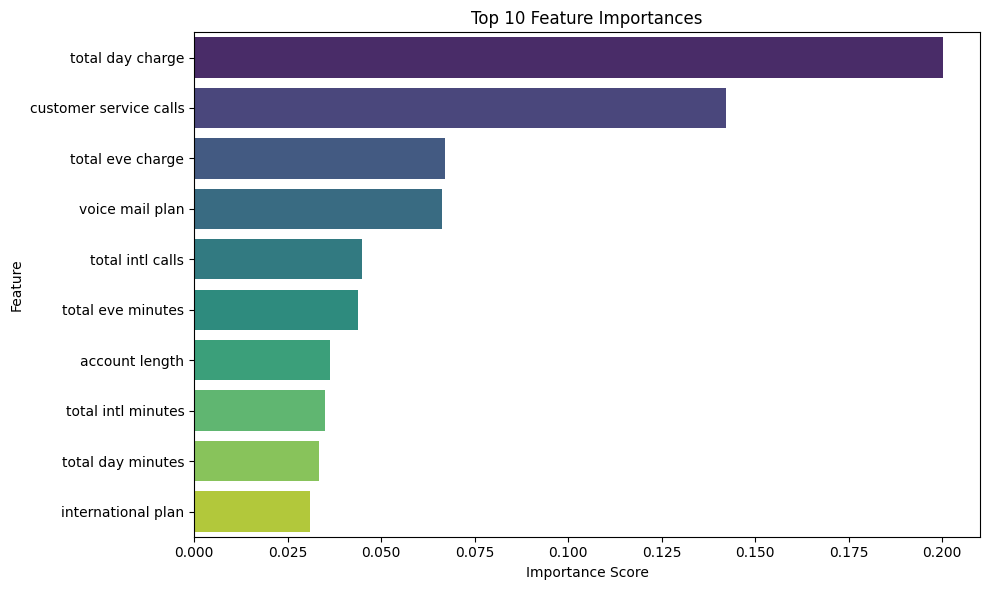

In [26]:
# Getting feature importances
importances = best_tree.feature_importances_
features = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Creating Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

This is a feature importance chart that displays the features most influencing the decision tree’s ability to predict customer churn.


**The top most influential features are:**

**total day charge**

Customers with higher daytime call charges are more likely to churn.

This could indicate frustration due to high daytime usage costs especially if users don’t perceive value for their money or if competitors offer better deals.

*Recommendation*

Segment customers with high day charges and monitor their satisfaction or churn risk.

Offering loyalty discounts, tiered plans, or flat-rate unlimited day calling may reduce pressure from pricing.

Consider campaigns that educate customers on optimizing their usage to lower perceived charges.



**customer service calls**

A high number of service calls is a strong churn indicator.


Frequent calls to customer service probably indicates dissatisfaction or unresolved issues. It seems to be a clear early warning signal of churn, such that if they aren't addressed quickly, they are likely to leave the service


*Recommendation*

Take note of users with multiple service calls in a short window as high risk.

Use predictive churn scores to trigger proactive customer support follow-ups, for example "We noticed you've contacted us multiple times — is there anything we can fix?"

Track the efficiency of customer service resolution and improve on it.


**total eve charge**

Evening call charges also contribute meaningfully to churn prediction.

This reinforces that the overall pricing structure is a driver of churn, not just peak-hour rates.

*Recommendation*

Create time-based promotions, for example, unlimited evening or weekend calling to reduce the perceived cost.

Add alerts or reminders for nearing plan limits or high evening usage to reduce the feeling of surprise bills on customers.

**voice mail plan**

Having or lacking voicemail services may reflect customer preferences and expectations about the completness of service.

Voice mail plan availability might be linked to customer satisfaction and perceived professionalism of service.

*Recommendation*

Survey users with and without voicemail to understand usage and importance.

If voicemail is underused but predictive of retention, include it in all plans as a perceived addition of value.


**account length**

This is one of the least important features to the model, meaning that long time customers aren't necessarily more loyal.

Churn is influenced more by recent behaviour than how long a customer has subscribed to the service.

Customers who show signs of dissatisfaction should be targeted, not just new customers or "at-risk segments" based on tenure.

# Conclusion

The objective was to predict customer churn using available customer service and usage data, and to identify key drivers of churn to support proactive retention strategies.


Among the models tested Logistic Regression, Decision Tree, the Decision Tree achieved the best balance between recall and precision, especially in identifying churners, with an ROC AUC of 0.80 and a recall of 0.72.

Total day charge and customer service calls were the most impertant features in predicting churn, suggesting that high pricing and customer dissatisfaction are the main drivers of churn.


Customers with high call charges and/or frequent customer service calls should be prioritized for retention strategies. Furthermore, plan pricing and service quality should be assessed to reduce triggers behind churn."

For even better model performances:

Try advanced models like XGBoost and Random Forest.

Use more recent data, or data that has more features to manipulate.

Build a real-time churn alert system.

The models built show encouraging results in churn prediction, especially when referring to decision trees with tuned hyperparameters. With proper deployment and thorough monitoring, the system could significantly improve customer retention efforts as they can zero in at-risk customers early.

